<a href="https://colab.research.google.com/github/aryuzura/capstoneproject_raniazamrizq/blob/main/Analisis_Faktor_Pengaruh_Tinggi_dan_Rendahnya_GPA_Mahasiswa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analisis Faktor Pengaruh Tinggi dan Rendahnya GPA Mahasiswa**

**NOTE!!**

1.   Step 1: Download dataset 'studentperfomancee.xlsx'
2.   Step 2: Upload ke Google Colab pada ikon 📁
3.   Run all/satu per satu

Untuk menjalankan dashboard
1. Download folder Capstone Project_Rania Zamrizq.zip
2. Extract di tempat yang kamu inginkan
3. Pilih 'Open Folder' di VSC
4. pilih folder yang sudah di download tadi
5. Buka app.py
6. Jalankan diterminal/cmd atau klik path tempat 'app.py' berada, kemudian masukkan 'cmd'
7. ketik 'streamlit run app.py', lalu enter

In [1]:
!pip install pandas matplotlib seaborn scikit-learn streamlit pyngrok langchain_community replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from pyngrok import ngrok
from langchain_community.llms import Replicate
import os
from google.colab import userdata

In [3]:
api_token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = api_token
model = Replicate(model="ibm-granite/granite-3.3-8b-instruct", replicate_api_token=api_token)

In [5]:
df = pd.read_excel('studentperfomancee.xlsx')

In [6]:
print("Data awal:")
print(df.head())

Data awal:
   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          1                  3               16   
1       1002   18       1          2                  0               17   
2       1003   15       1          0                  1               13   
3       1004   17       1          0                  3                6   
4       1005   17       0          1                  2                6   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0        13         0                2              0.0     0.0    0.0   
1        28         0                2              1.0     0.0    1.0   
2        18         1                4              0.0     0.0    0.0   
3         4         0                3              1.0     0.0    0.0   
4        20         0                4              0.0     0.0    0.0   

   Volunteering           GPA  
0             0  3.158425e+15  
1             0  2.7946

##ANALISIS MISSING VALUE

**Informasi Dataset**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          100 non-null    int64  
 1   Age                100 non-null    int64  
 2   Gender             100 non-null    int64  
 3   Ethnicity          100 non-null    int64  
 4   ParentalEducation  100 non-null    int64  
 5   StudyTimeWeekly    100 non-null    int64  
 6   Absences           100 non-null    int64  
 7   Tutoring           100 non-null    int64  
 8   ParentalSupport    100 non-null    int64  
 9   Extracurricular    99 non-null     float64
 10  Sports             97 non-null     float64
 11  Music              98 non-null     float64
 12  Volunteering       100 non-null    int64  
 13  GPA                100 non-null    float64
dtypes: float64(4), int64(10)
memory usage: 11.1 KB


**5 Baris Pertama**

In [8]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,1001,17,1,1,3,16,13,0,2,0.0,0.0,0.0,0,3.158425e+15
1,1002,18,1,2,0,17,28,0,2,1.0,0.0,1.0,0,2.794655e+16
2,1003,15,1,0,1,13,18,1,4,0.0,0.0,0.0,1,3.774847e+15
3,1004,17,1,0,3,6,4,0,3,1.0,0.0,0.0,0,3.040574e+16
4,1005,17,0,1,2,6,20,0,4,0.0,0.0,0.0,0,3.382310e+16


**Statistik Deskriptif**

In [9]:
df.describe(include='all')

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,99.000000,97.000000,98.000000,100.000000,1.000000e+02
mean,1120.640000,16.550000,0.510000,0.870000,2.25000,10.660000,15.300000,0.300000,2.370000,0.515152,0.360825,0.336735,0.280000,1.551971e+16
std,68.342648,1.183856,0.502418,1.050781,1.27426,5.787866,9.017939,0.460566,1.203152,0.502314,0.482735,0.475023,0.451261,1.545565e+16
min,1001.000000,15.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+00
25%,1107.750000,15.000000,0.000000,0.000000,1.00000,6.000000,7.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+00
50%,1120.000000,17.000000,1.000000,0.500000,2.00000,11.500000,15.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,3.943651e+15
75%,1132.250000,18.000000,1.000000,1.250000,3.00000,15.000000,23.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,3.017095e+16
max,1271.000000,18.000000,1.000000,3.000000,4.00000,20.000000,30.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.979049e+16


Jumlah Missing Values Sebelum Cleaning:

In [10]:
df.isnull().sum()

,0
StudentID,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,1


Hilangkan missing values

Imputasi kolom numerik

In [11]:
num_cols = ['Extracurricular', 'Sports', 'Music']
imputer_num = SimpleImputer(strategy='median')
df[num_cols] = imputer_num.fit_transform(df[num_cols])

Hilangkan noise, jika ada GPA di luar 0-4 (misalnya salah input)

In [12]:
print("\nJumlah Missing Values Setelah Cleaning:")
print(df.isnull().sum())


Jumlah Missing Values Setelah Cleaning:
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
dtype: int64


In [13]:
df = df[(df['GPA'] >= 0) & (df['GPA'] <= 4)]

##Data Transformation

Encoding Data Kategorikal

In [14]:
le = LabelEncoder()

if 'ParentalEducation' in df.columns:
    df['ParentalEducation'] = le.fit_transform(df['ParentalEducation'])

if 'ParentalSupport' in df.columns:
    df['ParentalSupport'] = le.fit_transform(df['ParentalSupport'])

Normalisasi fitur numerik

In [15]:
scaler = StandardScaler()
X = df.drop(['GPA', 'StudentID'], axis=1, errors='ignore')
y = df['GPA']
X_scaled = scaler.fit_transform(X)

In [16]:
print("\nData setelah preprocessing:")
print(df.head())


Data setelah preprocessing:
    StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
5        1006   18       0          3                  3               13   
7        1008   15       0          0                  3               11   
11       1012   17       1          3                  3                8   
22       1110   17       0          0                  3               17   
27       1115   17       0          0                  3                0   

    Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
5         23         1                2              1.0     0.0    1.0   
7          8         0                3              0.0     0.0    1.0   
11        18         0                2              1.0     0.0    0.0   
22        18         0                3              1.0     1.0    1.0   
27        29         0                1              1.0     0.0    0.0   

    Volunteering  GPA  
5              0  4.0  
7        

##Classification

Klasifikasikan GPA (misal tinggi >=3.0, sedang 2.0-3.0, rendah <2.0)

In [17]:
y_class = pd.cut(y, bins=[0,2,3,4], labels=["Low","Medium","High"])


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_class, test_size=0.2, random_state=42)


clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         6

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



##Evaluasi Pola

Feature Importance

In [18]:
feat_importance = pd.DataFrame({
'feature': X.columns,
'importance': clf.feature_importances_
}).sort_values(by='importance', ascending=False)


print("\nFaktor paling berpengaruh:")
print(feat_importance)


Faktor paling berpengaruh:
              feature  importance
5            Absences    0.389452
4     StudyTimeWeekly    0.318399
7     ParentalSupport    0.083754
2           Ethnicity    0.048781
8     Extracurricular    0.036544
0                 Age    0.029310
9              Sports    0.026016
10              Music    0.016076
1              Gender    0.015897
11       Volunteering    0.014510
3   ParentalEducation    0.012096
6            Tutoring    0.009165


##Visualisasi

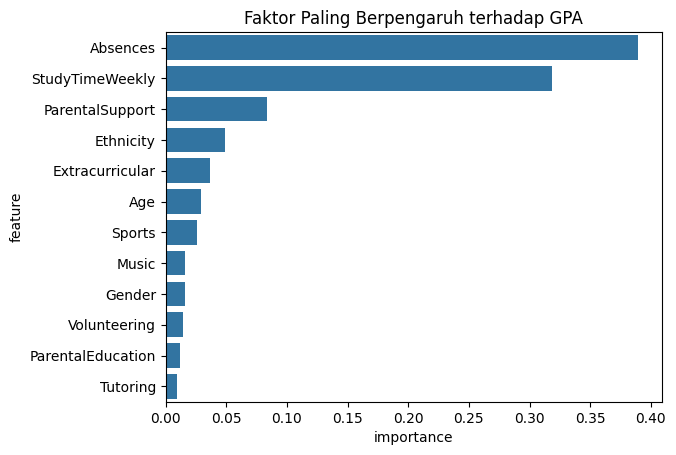

In [19]:
sns.barplot(x='importance', y='feature', data=feat_importance)
plt.title("Faktor Paling Berpengaruh terhadap GPA")
plt.show()

AI Support (IBM Granite)

In [20]:
analysis_text = f"""
Berikut ringkasannya:
- Faktor paling berpengaruh terhadap GPA: {feat_importance.iloc[0]['feature']}.
- Hasil klasifikasi menunjukkan distribusi nilai siswa dalam kategori Low, Medium, High.
"""


summary = model.invoke(f"Ringkas dan jelaskan hasil analisis data pendidikan siswa ini serta Tuliskan Insight, Findings, Conclusion, dan Recommendation(Rekomendasi sesuai insight, konkret, dan berdampak nyata terhadap permasalahan) berdasarkan data ini secara logis dan menyeluruh: {analysis_text}")
print("\nAI Summarization (IBM Granite)")
print(summary)


AI Summarization (IBM Granite)
**Insight:** The data analysis reveals that student absences have the most significant impact on their Grade Point Average (GPA). This suggests that attendance is a critical factor in academic performance.

**Findings:** The classification results indicate a distribution of students' values into three categories: Low, Medium, and High. This categorization is likely based on their GPAs, with 'Low' representing students with the lowest GPAs, 'Medium' for those in the middle range, and 'High' for students with the highest GPAs.

**Conclusion:** The analysis confirms that student absences negatively affect their academic performance, as evidenced by their GPAs. The distribution of students into Low, Medium, and High categories underscores the need for targeted interventions to improve attendance and, consequently, academic outcomes.

**Recommendation:** To address the issue of absences impacting GPAs, consider implementing strategies such as:

1. **Improving

Conclusion & Recommendation

##Dashboard

Buat file app.py

In [ ]:
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

@st.cache_data
def load_data():
    df = pd.read_excel("studentperfomancee.xlsx")
    df.columns = df.columns.str.strip()
    return df

df = load_data()

st.title("📊 Dashboard Analisis Faktor yang Mempengaruhi GPA Mahasiswa")
st.write("Dashboard ini menganalisis faktor yang sangat berpengaruh dengan nilai mahasiswa (GPA).")

df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df = df[(df['GPA'] >= 0) & (df['GPA'] <= 4)]

le = LabelEncoder()
for col in ['ParentalEducation', 'ParentalSupport']:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

y = df['GPA']
X = df.drop(['GPA', 'StudentID'], axis=1, errors='ignore')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


import numpy as np
y_class = pd.cut(y, bins=[0,2,3,4], labels=["Low","Medium","High"])

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_class, test_size=0.2, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


st.subheader("Distribusi GPA")
fig, ax = plt.subplots()
sns.histplot(df['GPA'], kde=True, bins=20, ax=ax)
plt.xlabel("GPA")
plt.ylabel("Frekuensi")
st.pyplot(fig)


feat_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': clf.feature_importances_
}).sort_values(by='importance', ascending=False)

st.subheader("Faktor Paling Berpengaruh terhadap GPA")
fig3, ax3 = plt.subplots()
sns.barplot(x='importance', y='feature', data=feat_importance, ax=ax3)
st.pyplot(fig3)

st.subheader("Classification Report")
report = classification_report(y_test, y_pred, output_dict=True)
st.dataframe(pd.DataFrame(report).transpose())


main_factor = feat_importance.iloc[0]['feature']
st.subheader("Insight & Finding")
st.write(f"Faktor yang paling berpengaruh terhadap GPA mahasiswa adalah **{main_factor}**. Hal ini menegaskan bahwa **{main_factor}** yang konsisten sangat penting bagi tinggi rendahnya GPA mahasiswa. \n")
st.write(f"Hasil klasifikasi membagi nilai siswa ke dalam tiga kategori: Rendah, Sedang, dan Tinggi. Kategorisasi ini didasarkan pada GPA, yang mencerminkan adanya rentang capaian akademik di antara siswa.")
st.write(f"Analisis data menekankan bahwa kehadiran merupakan faktor utama dalam menentukan performa akademik siswa. Distribusi siswa dalam kategori Rendah, Sedang, dan Tinggi menunjukkan adanya spektrum kemampuan akademik yang luas, serta kebutuhan akan intervensi khusus bagi siswa dengan GPA rendah.")
st.write(f"Rekomendasi: Untuk mengatasi masalah absensi yang berpengaruh terhadap GPA, strategi yang dapat diterapkan antara lain: \n"

f"""
    1. Program Intervensi Dini: Mengidentifikasi siswa yang berisiko memiliki kehadiran buruk sejak awal tahun ajaran dan memberikan dukungan yang diperlukan.

    2. Keterlibatan Orang Tua: Memperkuat komunikasi dengan orang tua untuk memahami dan mengatasi hambatan kehadiran siswa.

    3. Program Insentif: Memberikan penghargaan atau pengakuan bagi siswa dengan kehadiran konsisten untuk meningkatkan motivasi.

    4. Dukungan Belajar Tambahan: Menyediakan bimbingan belajar atau les tambahan bagi siswa dengan GPA rendah agar dapat memperbaiki performa akademiknya.

    5. Tinjauan Kebijakan: Mengevaluasi kebijakan sekolah terkait absensi agar tidak secara tidak langsung memperburuk tingkat kehadiran siswa.

Rekomendasi ini bertujuan untuk secara langsung mengatasi permasalahan absensi yang memengaruhi GPA serta memberikan dukungan tepat sasaran bagi siswa yang membutuhkan, sehingga dapat meningkatkan performa akademik secara keseluruhan dan memperkecil kesenjangan antara kategori Rendah, Sedang, dan Tinggi.""")




In [21]:
!pip install streamlit

In [ ]:
!pip install pyngrok streamlit

In [ ]:
!streamlit run app.py